# K_Means

In [20]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from pandas import Series, DataFrame
import matplotlib.cm as cm
import seaborn as sn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans

In [8]:
Data = {'x' : [15,
15,
16,
19,
19,
20,
20,
21,
22,
28,
35,
40,
41,
42,
43,
44,
60,
61,
65
]}

In [9]:
df = DataFrame(Data, columns = ['x'])
df

,x
0,15
1,15
2,16
3,19
4,19
5,20
6,20
7,21
8,22
9,28


In [17]:
kmeans = KMeans(n_clusters = 2).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

label = kmeans.labels_#default index
label

[[47.88888889]
 [19.5       ]]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
kmeans.cluster_centers_

array([[47.88888889],
       [19.5       ]])

## Data_Set_Beers

In [21]:
b1 = pd.read_csv('beers.csv')
b1.head()

,Brand,Brewery,PercentAlcohol,Calories,Carbohydrates
0,Anchor Steam,Anchor,4.9,153,16.0
1,Anheuser Busch Natural Light,Anheuser Busch,4.2,95,3.2
2,Anheuser Busch Natural Ice,Anheuser Busch,5.9,157,8.9
3,Aspen Edge,Adolph Coors,4.1,94,2.6
4,Blatz Beer,Pabst,4.8,153,12.5


In [23]:
X = b1[['PercentAlcohol', 'Calories', 'Carbohydrates']]
X.head()

,PercentAlcohol,Calories,Carbohydrates
0,4.9,153,16.0
1,4.2,95,3.2
2,5.9,157,8.9
3,4.1,94,2.6
4,4.8,153,12.5


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\Vidhubala\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Vidhubala\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [28]:
kmeans = KMeans(n_clusters = 4).fit(X_scaled)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
centroids = kmeans.cluster_centers_
print(centroids)

label = kmeans.labels_#default index
label

[[ 0.07200675  0.10076122  0.10723088]
 [ 0.80850157  1.09238448  0.96073747]
 [-0.77819357 -1.29848644 -1.30109334]
 [-5.828537   -2.57183645  0.53084307]]


array([1, 2, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 1,
       0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 0, 2,
       1, 2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0, 3, 2, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0])

### Looping_K_Means to find Cluster

In [32]:
cluster_range = range(1, 20)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(X_scaled)
    cluster_errors.append(clusters.inertia_)

In [35]:
clusters_df = pd.DataFrame({'num_clusters' : cluster_range, 'cluster_errors' : cluster_errors})
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,258.000000
1,2,121.377419
2,3,88.235176
3,4,59.158907
4,5,39.788677
5,6,32.535784
6,7,27.671813
7,8,23.633441
8,9,19.532349
9,10,17.169768


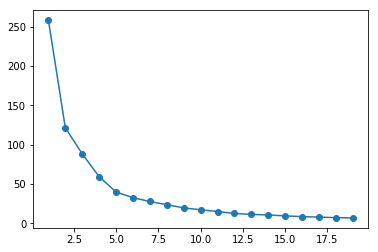

In [39]:
#Elbow_Graph
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = 'o')
plt.show()

In [42]:
kmeans = KMeans(n_clusters = 5).fit(X_scaled)
print(kmeans)

centroids = kmeans.cluster_centers_
print(centroids)

label = kmeans.labels_#default index
label

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[[-0.77819357 -1.29848644 -1.30109334]
 [ 0.42209864  1.0950085   1.34373107]
 [ 1.46344271  0.83034418 -0.03615518]
 [-0.0832217   0.0830567   0.2077509 ]
 [-5.828537   -2.57183645  0.53084307]]


array([1, 0, 2, 0, 3, 1, 3, 2, 0, 0, 3, 0, 3, 2, 0, 3, 2, 3, 0, 3, 1, 2,
       3, 1, 3, 3, 3, 0, 0, 0, 2, 3, 1, 3, 1, 1, 0, 0, 2, 3, 1, 3, 3, 0,
       1, 0, 0, 2, 3, 0, 3, 0, 0, 3, 0, 2, 4, 0, 3, 2, 3, 3, 2, 2, 3, 1,
       1, 1, 1, 3, 3, 2, 1, 1, 3, 0, 3, 3, 3, 1, 3, 3, 3, 3, 0, 3])

## Cancer_DataSet - Hands_On

In [43]:
cc = pd.read_csv('breast_cancer.csv')
cc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
cc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [46]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [48]:
cc.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [51]:
cc.drop(['diagnosis'], axis = 1, inplace = True)

In [52]:
cc.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [55]:
cc1 = cc.loc[:, 'radius_mean' : 'fractal_dimension_worst']
cc1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [56]:
cc1.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cc1_scaled = scaler.fit_transform(cc1)

In [139]:
cc1_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [58]:
cluster_range = range(1, 20)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(cc1_scaled)
    cluster_errors.append(clusters.inertia_)

In [59]:
clusters_df = pd.DataFrame({'num_clusters' : cluster_range, 'cluster_errors' : cluster_errors})
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,17070.000000
1,2,11595.526607
2,3,10061.797818
3,4,9258.989105
4,5,8556.442915
5,6,7971.824524
6,7,7576.585333
7,8,7209.818920
8,9,6817.880736
9,10,6711.320833


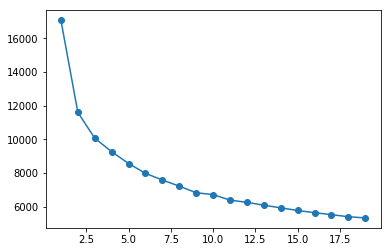

In [60]:
#Elbow_Graph
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = 'o')
plt.show()

In [63]:
kmeans = KMeans(n_clusters = 2).fit(cc1_scaled)
print(kmeans)

centroids = kmeans.cluster_centers_
print(centroids)

label = kmeans.labels_ #default index
label

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
[[ 0.97397614  0.48151381  1.0066346   0.96352718  0.60925407  1.020696
   1.13942935  1.16458212  0.61113855  0.25222982  0.85859633  0.04274078
   0.86027888  0.8071077   0.01706063  0.69505052  0.63689512  0.77623856
   0.14038222  0.41503212  1.04008365  0.50631048  1.06597067  1.00315418
   0.60829274  0.95083725  1.04429844  1.14621103  0.59741617  0.62246932]
 [-0.48442497 -0.23948977 -0.50066826 -0.47922799 -0.30302374 -0.50766196
  -0.56671617 -0.57922637 -0.30396101 -0.12545115 -0.4270387  -0.02125791
  -0.42787555 -0.40142988 -0.00848542 -0.34569618 -0.31677152 -0.38607654
  -0.06982168 -0.20642387 -0.51730476 -0.25182285 -0.53018015 -0.49893721
  -0.3025456  -0.47291642 -0.51940106 -0.57008917 -0.29713594 -0.30959659]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [66]:
label_1 = pd.Series(label)
cc1['Target'] = label
cc1.tail()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


## Logistic_Regression on K_Means Implemented Data

In [124]:
from sklearn.linear_model import LogisticRegression


X_1 = cc1_scaled
y_1 = cc1.Target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_1, y_1, test_size = 0.2, random_state = 100)

from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)

y_pred = model1.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


C:\Users\Vidhubala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9912280701754386

In [125]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix: ',confusion_matrix(y_test, y_pred))

Confusion Matrix:  [[44  0]
 [ 1 69]]


## Original_DataSet

In [90]:
cc = pd.read_csv('breast_cancer.csv')
cc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [77]:
cc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Logistic_Regression without scaling

In [100]:
X_2 = cc[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y_2 = cc.diagnosis

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.2, random_state = 100)

In [97]:
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()
model4.fit(x_train, y_train)

y_pred = model4.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

C:\Users\Vidhubala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9473684210526315

In [93]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix: ',confusion_matrix(y_test, y_pred))

Confusion Matrix:  [[62  3]
 [ 3 46]]


## Logistic_Regression with Scaling

In [140]:
cc_2 = cc[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cc2_scaled = scaler.fit_transform(cc_2)

X_3 = cc2_scaled
y_3 = cc.diagnosis

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_3, y_3, test_size = 0.2, random_state = 100)

from sklearn.linear_model import LogisticRegression
model5 = LogisticRegression()
model5.fit(x_train, y_train)

y_pred = model5.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


C:\Users\Vidhubala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9736842105263158

## K_Means Implemented Data

In [126]:
X_1 = cc1_scaled
y_1 = cc1.Target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_1, y_1, test_size = 0.2, random_state = 100)

## SVM

In [127]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


# Decision_Tree 

## Model_Gini

In [128]:
from sklearn.tree import DecisionTreeClassifier

model_gini=DecisionTreeClassifier()
model_gini.fit(x_train, y_train)

preds_gini = model_gini.predict(x_test)
preds_gini_train = model_gini.predict(x_train)

#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_gini = confusion_matrix(y_test,preds_gini)

print("confusion matrix = \n",mat_gini)

#Calculate accuracy
print(accuracy_score(y_test,preds_gini))
#print(accuracy_score(y_train,preds_gini_train))

confusion matrix = 
 [[42  2]
 [ 3 67]]
0.956140350877193


## Model_Entropy

In [129]:
model_entropy = DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(x_train, y_train)

preds_entropy = model_entropy.predict(x_test)
preds_entropy_train = model_entropy.predict(x_train)

#Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
mat_entropy = confusion_matrix(y_test,preds_entropy)

print("confusion matrix = \n",mat_entropy)
print(accuracy_score(y_test,preds_entropy))

confusion matrix = 
 [[44  0]
 [ 1 69]]
0.9912280701754386


## Naive_Bayes

In [130]:
from sklearn.naive_bayes import GaussianNB 

classifier = GaussianNB()
classifier.fit(x_train, y_train)

y_pred_G = classifier.predict(x_test)
y_pred_G

print(confusion_matrix(y_test, y_pred_G))
print(accuracy_score(y_test, y_pred_G))

[[44  0]
 [ 2 68]]
0.9824561403508771


## KNN

In [131]:
from sklearn.neighbors import KNeighborsClassifier  

classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(x_train, y_train)  

y_pred = classifier.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(accuracy_score(y_test, y_pred))  

[[43  1]
 [ 1 69]]
0.9824561403508771


## Random_Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

clas = RandomForestClassifier(n_estimators=20, random_state=0)  
clas.fit(x_train, y_train)  

y_pred = clas.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(accuracy_score(y_test, y_pred)) 

[[42  2]
 [ 1 69]]
0.9736842105263158
